In [39]:
# 重要参数,属性与接口
# MSE均方误差 样本真实数据与预测结果的差异
# friedman_mse
# mae绝对平均误差

# 回归树的接口score默认返回的是R平方,不是mse
# sklearn计算的时候是负数表示,neg_mean_squared_error

In [40]:
#交叉验证 观察模型稳定性
# cross_val_score
from sklearn.model_selection import cross_val_score

In [41]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [42]:
boston = load_boston()
boston

C:\Users\Peng\anaconda3\envs\py37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [43]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [44]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [45]:
regressor = DecisionTreeRegressor(random_state=0) #实例化
cross_val_score(regressor,boston.data,boston.target,cv = 10
                ,scoring='neg_mean_squared_error'  #回归默认返回r平方
                )

array([-18.08941176, -10.61843137, -16.31843137, -44.97803922,
       -17.12509804, -49.71509804, -12.9986    , -88.4514    ,
       -55.7914    , -25.0816    ])

In [46]:
#一维回归图像的绘制
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [47]:
#创建一条含有噪声的正弦曲线

In [48]:
rng = np.random.RandomState(1) #随机数种子

In [49]:
rng.rand(80,1)*5 #80行1列数组

array([[2.08511002e+00],
       [3.60162247e+00],
       [5.71874087e-04],
       [1.51166286e+00],
       [7.33779454e-01],
       [4.61692974e-01],
       [9.31301057e-01],
       [1.72780364e+00],
       [1.98383737e+00],
       [2.69408367e+00],
       [2.09597257e+00],
       [3.42609750e+00],
       [1.02226125e+00],
       [4.39058718e+00],
       [1.36937966e-01],
       [3.35233755e+00],
       [2.08652401e+00],
       [2.79344914e+00],
       [7.01934693e-01],
       [9.90507445e-01],
       [4.00372284e+00],
       [4.84130788e+00],
       [1.56712089e+00],
       [3.46161308e+00],
       [4.38194576e+00],
       [4.47303332e+00],
       [4.25221057e-01],
       [1.95273916e-01],
       [8.49152098e-01],
       [4.39071252e+00],
       [4.91734169e-01],
       [2.10553813e+00],
       [4.78944765e+00],
       [2.66582642e+00],
       [3.45938557e+00],
       [1.57757816e+00],
       [3.43250464e+00],
       [4.17312836e+00],
       [9.14413867e-02],
       [3.75072157e+00],


In [50]:
x = np.sort(5*np.random.RandomState(1).rand(80,1),axis=0)
x #横坐标的数据

array([[5.71874087e-04],
       [9.14413867e-02],
       [9.68347894e-02],
       [1.36937966e-01],
       [1.95273916e-01],
       [2.49767295e-01],
       [2.66812726e-01],
       [4.25221057e-01],
       [4.61692974e-01],
       [4.91734169e-01],
       [5.11672144e-01],
       [5.16130033e-01],
       [6.50142861e-01],
       [6.87373521e-01],
       [6.96381736e-01],
       [7.01934693e-01],
       [7.33642875e-01],
       [7.33779454e-01],
       [8.26770986e-01],
       [8.49152098e-01],
       [9.31301057e-01],
       [9.90507445e-01],
       [1.02226125e+00],
       [1.05814058e+00],
       [1.32773330e+00],
       [1.40221996e+00],
       [1.43887669e+00],
       [1.46807074e+00],
       [1.51166286e+00],
       [1.56712089e+00],
       [1.57757816e+00],
       [1.72780364e+00],
       [1.73882930e+00],
       [1.98383737e+00],
       [1.98838418e+00],
       [2.07027994e+00],
       [2.07089635e+00],
       [2.08511002e+00],
       [2.08652401e+00],
       [2.09597257e+00],


In [51]:
y = np.sin(x).ravel()  #ravel降维
y

array([ 5.71874056e-04,  9.13140084e-02,  9.66835240e-02,  1.36510390e-01,
        1.94035253e-01,  2.47178482e-01,  2.63658285e-01,  4.12522163e-01,
        4.45464463e-01,  4.72155294e-01,  4.89635918e-01,  4.93517994e-01,
        6.05300129e-01,  6.34509327e-01,  6.41446076e-01,  6.45696215e-01,
        6.69579781e-01,  6.69681218e-01,  7.35748344e-01,  7.50720534e-01,
        8.02397078e-01,  8.36304301e-01,  8.53289303e-01,  8.71444956e-01,
        9.70605329e-01,  9.85824622e-01,  9.91311217e-01,  9.94728365e-01,
        9.98252126e-01,  9.99993246e-01,  9.99977003e-01,  9.87699652e-01,
        9.85915646e-01,  9.15904395e-01,  9.14069859e-01,  8.77830014e-01,
        8.77534605e-01,  8.70630546e-01,  8.69934082e-01,  8.65235592e-01,
        8.60400242e-01,  7.84646075e-01,  6.31686553e-01,  5.37227991e-01,
        4.58019714e-01,  4.45838347e-01,  4.32721158e-01,  3.41153283e-01,
        2.67699531e-01,  2.07303185e-01,  1.93830272e-01, -1.76451855e-01,
       -2.09188375e-01, -

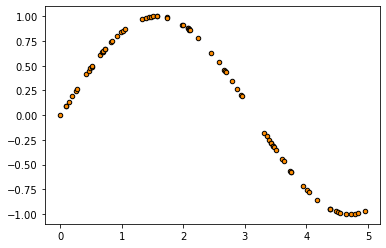

In [52]:
plt.figure()
plt.scatter(x,y,s = 20,edgecolors='black',c = 'darkorange',label = 'data')

In [57]:
rng = np.random.RandomState(2)#随机数种子
X = np.sort(5*rng.rand(80,1),axis=0)#生成0-5之间随机的x取值
y = np.sin(x).ravel()#生成正弦曲线
y[::5] += 3*(0.5- rng.rand(16))# 在正弦曲线上加噪声,随机变量

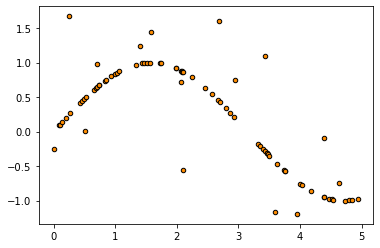

In [58]:
plt.figure()
plt.scatter(x,y,s = 20,edgecolors='black',c = 'darkorange',label = 'data')

In [67]:
regr_2 = DecisionTreeRegressor(max_depth=2)
regr_3 = DecisionTreeRegressor(max_depth=3)
regr_5 = DecisionTreeRegressor(max_depth=5)
regr_2.fit(x,y)
regr_3.fit(x,y)
regr_5.fit(x,y)

DecisionTreeRegressor(max_depth=5)

In [68]:
x_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]  #[np.newaxis,:]转置
x_test.shape

(500, 1)

In [69]:
y_2 = regr_2.predict(x_test)
y_5 = regr_5.predict(x_test)
y_3 = regr_3.predict(x_test)

In [70]:
y_2

array([ 0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70022168,
        0.70022168,  0.70022168,  0.70022168,  0.70022168,  0.70

In [71]:
y_5

array([-0.24748279, -0.24748279, -0.24748279, -0.24748279, -0.24748279,
        0.10816931,  0.10816931,  0.10816931,  0.10816931,  0.10816931,
        0.10816931,  0.10816931,  0.10816931,  0.10816931,  0.10816931,
        0.10816931,  0.10816931,  0.19403525,  0.19403525,  0.19403525,
        0.19403525,  0.19403525,  0.19403525,  1.67052566,  1.67052566,
        1.67052566,  0.34839134,  0.34839134,  0.34839134,  0.34839134,
        0.34839134,  0.34839134,  0.34839134,  0.34839134,  0.34839134,
        0.34839134,  0.34839134,  0.34839134,  0.34839134,  0.34839134,
        0.34839134,  0.34839134,  0.34839134,  0.34839134,  0.34839134,
        0.34839134,  0.34839134,  0.34839134,  0.34839134,  0.34839134,
        0.34839134,  0.34839134,  0.34839134,  0.34839134,  0.34839134,
        0.34839134,  0.34839134,  0.34839134,  0.34839134,  0.82877245,
        0.82877245,  0.82877245,  0.82877245,  0.82877245,  0.82877245,
        0.82877245,  0.82877245,  0.82877245,  0.82877245,  0.82

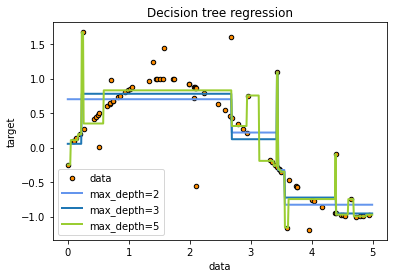

In [73]:
plt.figure()
plt.scatter(x,y
            ,s = 20
            ,edgecolors='black'
            ,c = 'darkorange'
            ,label = 'data'
            )
plt.plot(x_test,y_2,color = 'cornflowerblue',label='max_depth=2',linewidth = 2)
plt.plot(x_test,y_3,label='max_depth=3',linewidth = 2)
plt.plot(x_test,y_5,color = 'yellowgreen',label='max_depth=5',linewidth = 2)
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision tree regression')
plt.legend()
plt.show()

#泰坦尼克号数据

In [135]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [113]:
data = pd.read_csv(r'F:\Downloads\datasets_80599_187274_train_clean.csv')

In [114]:
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,NaN,S,13.0000,"Montvila, Rev. Juozas",0,887,2,male,0,0.0,211536,Rev,0
887,19.0,B42,S,30.0000,"Graham, Miss. Margaret Edith",0,888,1,female,0,1.0,112053,Miss,0
888,22.0,NaN,S,23.4500,"Johnston, Miss. Catherine Helen ""Carrie""",2,889,3,female,1,0.0,W./C. 6607,Miss,3
889,26.0,C148,C,30.0000,"Behr, Mr. Karl Howell",0,890,1,male,0,1.0,111369,Mr,0


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Cabin        204 non-null    object 
 2   Embarked     891 non-null    object 
 3   Fare         891 non-null    float64
 4   Name         891 non-null    object 
 5   Parch        891 non-null    int64  
 6   PassengerId  891 non-null    int64  
 7   Pclass       891 non-null    int64  
 8   Sex          891 non-null    object 
 9   SibSp        891 non-null    int64  
 10  Survived     891 non-null    float64
 11  Ticket       891 non-null    object 
 12  Title        891 non-null    object 
 13  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 97.6+ KB


In [116]:
data.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0
5,30.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,Mr,0
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,Mr,0
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Master,4
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Mrs,2
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Mrs,1


# 数据预处理

In [117]:
#筛选特征
data.drop(['Cabin','Name','Ticket'],inplace= True,axis = 1) #axis=1删除列
data

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,Family_Size
0,22.0,S,7.2500,0,1,3,male,1,0.0,Mr,1
1,38.0,C,71.2833,0,2,1,female,1,1.0,Mrs,1
2,26.0,S,7.9250,0,3,3,female,0,1.0,Miss,0
3,35.0,S,53.1000,0,4,1,female,1,1.0,Mrs,1
4,35.0,S,8.0500,0,5,3,male,0,0.0,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,S,13.0000,0,887,2,male,0,0.0,Rev,0
887,19.0,S,30.0000,0,888,1,female,0,1.0,Miss,0
888,22.0,S,23.4500,2,889,3,female,1,0.0,Miss,3
889,26.0,C,30.0000,0,890,1,male,0,1.0,Mr,0


In [118]:
data.shape

(891, 11)

#处理缺失值(均值填充)

In [119]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data = data.dropna()

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          891 non-null    float64
 1   Embarked     891 non-null    object 
 2   Fare         891 non-null    float64
 3   Parch        891 non-null    int64  
 4   PassengerId  891 non-null    int64  
 5   Pclass       891 non-null    int64  
 6   Sex          891 non-null    object 
 7   SibSp        891 non-null    int64  
 8   Survived     891 non-null    float64
 9   Title        891 non-null    object 
 10  Family_Size  891 non-null    int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 83.5+ KB


In [121]:
data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,Family_Size
0,22.0,S,7.2500,0,1,3,male,1,0.0,Mr,1
1,38.0,C,71.2833,0,2,1,female,1,1.0,Mrs,1
2,26.0,S,7.9250,0,3,3,female,0,1.0,Miss,0
3,35.0,S,53.1000,0,4,1,female,1,1.0,Mrs,1
4,35.0,S,8.0500,0,5,3,male,0,0.0,Mr,0


In [122]:
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x))

In [123]:
data.head(100)

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,Family_Size
0,22.0,0,7.2500,0,1,3,male,1,0.0,Mr,1
1,38.0,1,71.2833,0,2,1,female,1,1.0,Mrs,1
2,26.0,0,7.9250,0,3,3,female,0,1.0,Miss,0
3,35.0,0,53.1000,0,4,1,female,1,1.0,Mrs,1
4,35.0,0,8.0500,0,5,3,male,0,0.0,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
95,30.0,0,8.0500,0,96,3,male,0,0.0,Mr,0
96,71.0,1,34.6542,0,97,1,male,0,0.0,Mr,0
97,23.0,1,63.3583,1,98,1,male,0,1.0,Mr,1
98,34.0,0,23.0000,1,99,2,female,0,1.0,Mrs,1


In [124]:
labels

['S', 'C', 'Q']

In [125]:
a = data.loc[:,'Sex'] == 'male'
a

0       True
1      False
2      False
3      False
4       True
       ...  
886     True
887    False
888    False
889     True
890     True
Name: Sex, Length: 891, dtype: bool

In [126]:
data.loc[:,'Sex'] = (data.loc[:,'Sex'] == 'male').astype('int')
data.loc[:,'Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [128]:
data.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,Family_Size
0,22.0,0,7.2500,0,1,3,1,1,0.0,Mr,1
1,38.0,1,71.2833,0,2,1,0,1,1.0,Mrs,1
2,26.0,0,7.9250,0,3,3,0,0,1.0,Miss,0
3,35.0,0,53.1000,0,4,1,0,1,1.0,Mrs,1
4,35.0,0,8.0500,0,5,3,1,0,0.0,Mr,0


In [132]:
data = data.drop(['Title'],axis=1)

In [133]:
x = data.iloc[:,data.columns != 'Survived']
x

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Family_Size
0,22.0,0,7.2500,0,1,3,1,1,1
1,38.0,1,71.2833,0,2,1,0,1,1
2,26.0,0,7.9250,0,3,3,0,0,0
3,35.0,0,53.1000,0,4,1,0,1,1
4,35.0,0,8.0500,0,5,3,1,0,0
...,...,...,...,...,...,...,...,...,...
886,27.0,0,13.0000,0,887,2,1,0,0
887,19.0,0,30.0000,0,888,1,0,0,0
888,22.0,0,23.4500,2,889,3,0,1,3
889,26.0,1,30.0000,0,890,1,1,0,0


In [134]:
y = data.iloc[:,data.columns == 'Survived']
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [137]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y)

In [140]:
Xtrain.shape[0]

668

In [141]:
for i in [Xtrain,Xtest,Ytrain,Ytest ]:
    i.index = range(i.shape[0])

In [142]:
Xtrain

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Family_Size
0,31.0,0,7.7750,0,806,3,1,0,0
1,40.0,0,7.8958,0,562,3,1,0,0
2,28.0,0,14.4000,1,424,3,0,1,2
3,32.0,0,15.8500,0,207,3,1,1,1
4,31.0,1,113.2750,0,216,1,0,1,1
...,...,...,...,...,...,...,...,...,...
663,45.0,0,83.4750,0,63,1,1,1,1
664,22.0,2,7.7375,0,728,3,0,0,0
665,19.0,0,8.0500,0,284,3,1,0,0
666,20.0,1,15.7417,1,623,3,1,1,2


In [147]:
clf = DecisionTreeClassifier(random_state=2)
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)
score

0.7757847533632287

In [149]:
clf = DecisionTreeClassifier(random_state=2)
clf = clf.fit(Xtrain,Ytrain)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7474781523096129

0.938622754491018
0.8204244694132333


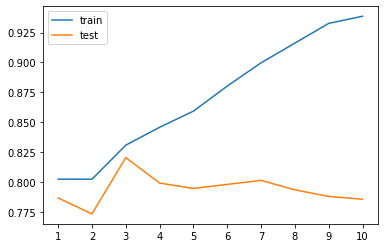

In [158]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=2
                                 ,max_depth=i+1
                                 # ,criterion='entropy'
                                 )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv = 10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(tr))
print(max(te))
plt.plot(range(1,11),tr,label = 'train')
plt.plot(range(1,11),te,label = 'test')
plt.xticks(range(1,11))#x轴1-10的整数
plt.legend()
plt.show()

In [160]:
#网格搜索 多参数调整/枚举技术,无法舍弃参数

In [162]:
import numpy as np
gini_threholds = np.linspace(0,0.5,50) #0-0.5,取50个有顺序的数 等差数列 entroy 0,1,50

parameters = {'criterion':('gini','entropy')
              ,'splitter':('best','random')
              ,'max_depth':[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,50)]}  #信息增益的最小值,小于此值便不再分支
clf = DecisionTreeClassifier(random_state=2)
GS =  GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(Xtrain,Ytrain)


In [163]:
GS.best_params_ # 找出最好的参数,返回最佳组合

{'criterion': 'entropy',
 'max_depth': 3,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [164]:
GS.best_score_ # 网格搜索后的模型的评判标准

0.827928539122569